Use CNNs to classify fashion items in the Fashion-MNIST dataset.

Load and preprocess the Fashion-MNIST dataset.Build a CNN model using Keras/TensorFlow.Train the model on the training set and evaluate it on the test set.Tune hyperparameters such as learning rate, batch size, and epochs.Visualize the feature maps from different layers of the CNN.

Fashion MNIST Classification with CNN
Introduction

Fashion MNIST is a popular dataset consisting of 70,000 grayscale images of clothing items in 10 different categories. Each image is 28x28 pixels, making it a compact and manageable dataset for deep learning beginners and experts alike. In this notebook, we'll explore the Fashion MNIST dataset and build a Convolutional Neural Network (CNN) using TensorFlow's Keras API to classify the images.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

git clone git@github.com:zalandoresearch/fashion-mnist.git

Labels

Each training and test example is assigned to one of the following labels:
Label 	Description
0 	T-shirt/top
1 	Trouser
2 	Pullover
3 	Dress
4 	Coat
5 	Sandal
6 	Shirt
7 	Sneaker
8 	Bag
9 	Ankle boot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import layers,models


In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:


# Create the dataset object
fashion_mnist = tf.keras.datasets.fashion_mnist

# Load train and test sets as tuples
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



In [5]:
(train_images.shape,test_images.shape),(train_labels.shape,test_labels.shape)

(((60000, 28, 28), (10000, 28, 28)), ((60000,), (10000,)))

## train set contains 60000 images, test set contains 10000 images
## size of each image =(28,28)

In [6]:
train_images[0].shape

(28, 28)

In [7]:
train_labels[:2]

array([9, 0], dtype=uint8)

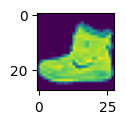

In [8]:
plt.figure(figsize=(2,1))
plt.imshow(train_images[0])

In [9]:
train_labels #it is already single dimension array, so no need to convert

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
label_desc={
0:"T-shirt/top",
1:"Trouser",
2:"Pullover",
3:"Dress",
4:"Coat",
5:"Sandal",
6:"Shirt",
7:"Sneaker",
8:"Bag",
9:"Ankle boot"}

In [11]:
# Reshape images to (num_samples, 28, 28, 1) for CNNs
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [12]:
train_images[0].shape

(28, 28, 1)

## X or train_image values are not standardized 

In [13]:
train_images=train_images/255
test_images=test_images/255

In [14]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## CNN= convolution+ReLu+Pooling+DNN

In [22]:
mnist_cnn=models.Sequential([
    # layers.Flatten(input_shape=train_images[0].shape),
    #CNN
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(train_images[0].shape)),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    #DNN
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(50,activation="relu"),
    layers.Dense(10,activation="softmax"),
])

In [23]:
# import keras.optimizers.Adam
# adam=Adam()
mnist_cnn.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [24]:
mnist_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,476 (720.61 KB)

 Trainable params: 184,476 (720.61 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
mnist_cnn.fit(train_images,train_labels,epochs=5,batch_size=100)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.6545 - loss: 0.9333
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.8386 - loss: 0.4493
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8629 - loss: 0.3753
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8755 - loss: 0.3450
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.8827 - loss: 0.3211


In [19]:
with open("mnist_cnn.pkl","wb") as f:
    pickle.dump(mnist_cnn,f)

with open("mnist_cnn.pkl","rb") as f:
    model_cnn_mnist_pkl=pickle.load(f)   

In [20]:
model_cnn_mnist_pkl.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8890 - loss: 0.2968


[0.2917670011520386, 0.8924999833106995]

In [28]:
from tensorflow import keras
#learning rate reduction and callbacks
lr_reduction= keras.callbacks.ReduceLROnPlateau(
             monitor="val_loss",
             patience=2,
             factor=0.5,
             min_lr=1e-5,
)

#training the model
history=mnist_cnn.fit(
    train_images,train_labels,epochs=20,
    batch_size=100,
    validation_split=0.2,
    callbacks=[lr_reduction],
    verbose=1,
)

len(history.history['val_loss'])

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.8913 - loss: 0.3008 - val_accuracy: 0.9086 - val_loss: 0.2422 - learning_rate: 0.0010
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8923 - loss: 0.2894 - val_accuracy: 0.9055 - val_loss: 0.2493 - learning_rate: 0.0010
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8982 - loss: 0.2761 - val_accuracy: 0.9106 - val_loss: 0.2402 - learning_rate: 0.0010
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9008 - loss: 0.2644 - val_accuracy: 0.9097 - val_loss: 0.2418 - learning_rate: 0.0010
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.9043 - loss: 0.2567 - val_accuracy: 0.9097 - val_loss: 0.2439 - learning_rate: 0.0010
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9105 - loss: 0.2403 - val_accuracy: 0.9160 - val_loss: 0.2249 - learning_rate: 5.0000e-04
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9130

20

In [29]:
test_loss,test_accu=mnist_cnn.evaluate(test_images,test_labels,verbose=2)


313/313 - 1s - 4ms/step - accuracy: 0.9164 - loss: 0.2288


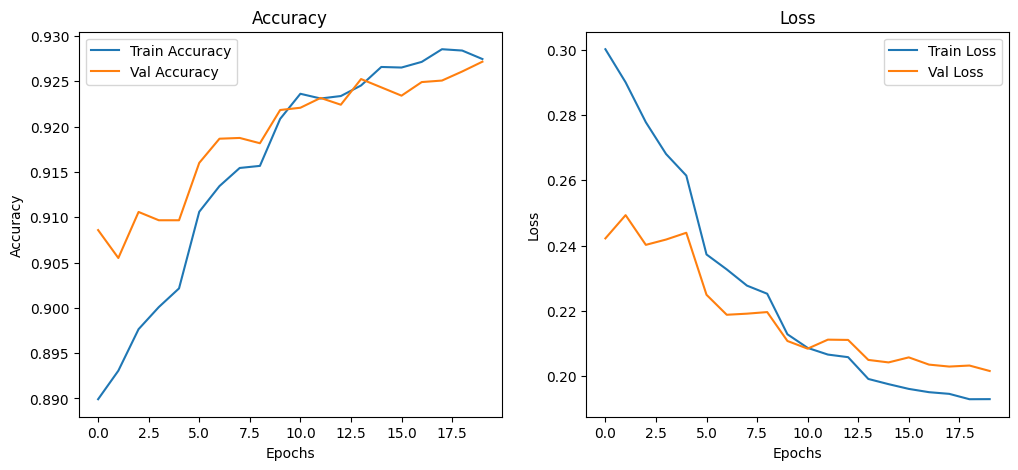

In [30]:
# Visualizing Training Performance

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [41]:
# feature_model=keras.Sequential()

In [53]:
# # Creating a sub-model for feature extraction
# feature_model = keras.models.Model(inputs=mnist_cnn, outputs=[layer.output for layer in mnist_cnn.layers if 'conv2d' in layer.name])
# # # Creating a sub-model for feature extraction
# # feature_model = keras.models.Model(inputs=mnist_cnn.input, outputs=[layer.output for layer in mnist_cnn.layers if 'conv2d' in layer.name])

# example_image = train_images[0].reshape(1, 28, 28, 1)
# feature_maps = feature_model.predict(example_image)

# # Visualizing the feature maps for each layer
# for layer_index, fmap in enumerate(feature_maps):
#     num_filters = fmap.shape[-1]  # Number of filters
#     size = fmap.shape[1]  # Size of the feature map

#     # Creating a grid for visualization
#     grid = np.zeros((size * num_filters, size))

#     for i in range(num_filters):
#         filter_map = fmap[0, :, :, i]
#         grid[i * size: (i + 1) * size, :] = filter_map

#     plt.figure(figsize=(15, 15))
#     plt.imshow(grid, aspect='auto', cmap='viridis')
#     plt.title(f'Feature Maps for Layer {layer_index + 1}')
#     plt.axis('off')
#     plt.show()

AttributeError: 'Sequential' object has no attribute 'pkl'